In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# import data
train_set= pd.read_csv('./Data/train.csv', index_col= 'id')
test_set= pd.read_csv('./Data/test.csv', index_col= 'id')


In [26]:
len(train_set.columns)

194

In [2]:
# store all duplicated columns
duplicated_cols_dict= {}
duplicated_cols_list_full = []


# THIS FUNCTION is to drop all duplicates columns
for i, col in enumerate(train_set.columns):
    duplicated_cols_list= []
    # if the col is already one of the keys
    # then skip
    if col in duplicated_cols_list_full:
        continue
    for c in train_set.columns:
        if (train_set[col].equals(train_set[c])):
            duplicated_cols_list.append(c)
            duplicated_cols_list_full.append(c)
        
           
    if (len(duplicated_cols_list) > 1):
        duplicated_cols_dict[col] = duplicated_cols_list   

In [3]:
from matplotlib.cbook import flatten

# determine duplicated columns to drop
drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [18]:
len(train_set.columns)

179

In [4]:
# drop the duplicates

train_set= train_set.drop(drop_cols, axis= 1)
test_set= test_set.drop(drop_cols, axis= 1)

In [5]:
cols_Vincent = train_set.columns[:int(len(train_set.columns)/2)]
cols_Duong = train_set.columns[int(len(train_set.columns)/2):]

Text(0.5, 1.0, 'Percentages of missing values in each column')

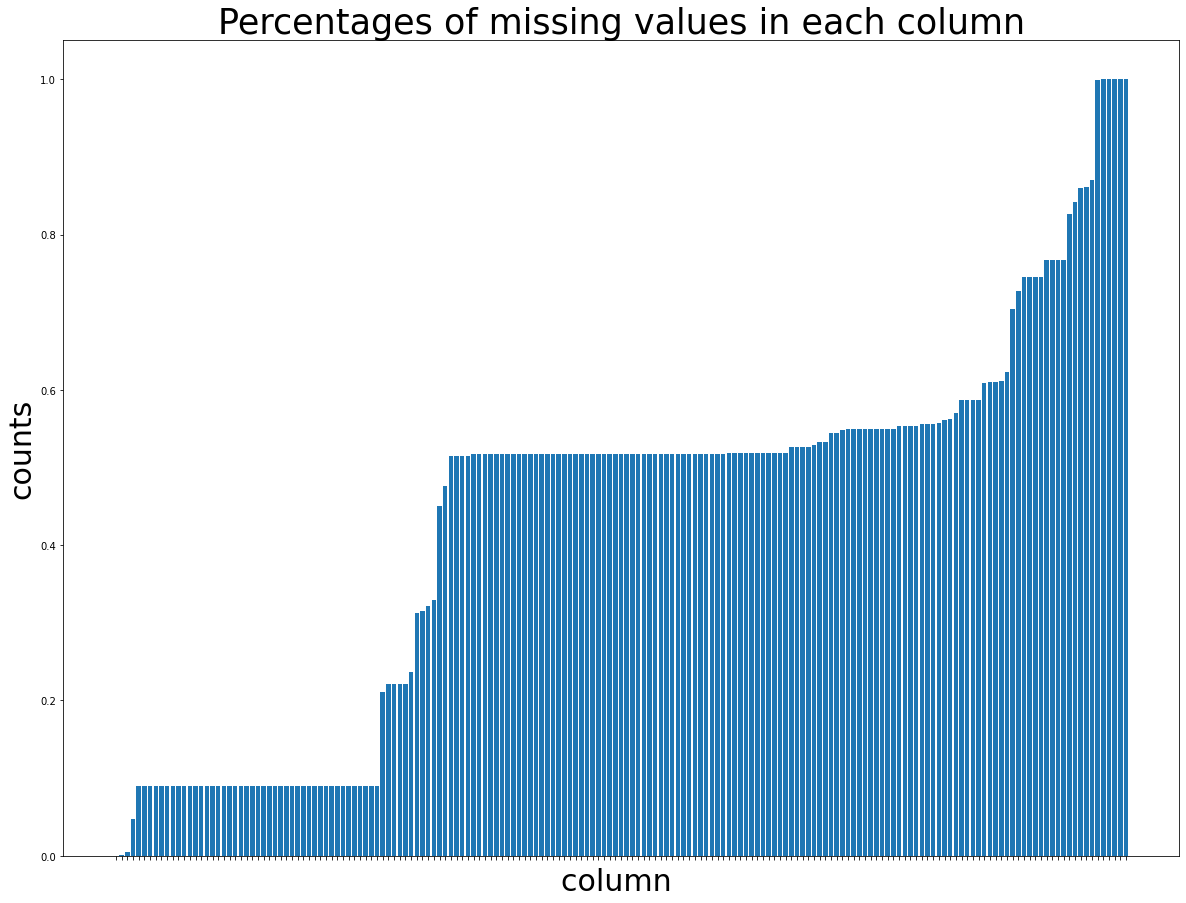

In [8]:
na_counts= train_set.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [9]:
train_set.describe()

,label,Field_3,Field_10,Field_13,Field_21,Field_22,Field_23,Field_24,Field_28,Field_29,...,partner5_G,Field_79,Field_80,Field_81,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200
count,53030.000000,25564.000000,25564.000000,25564.0,2.556400e+04,2.556400e+04,25564.000000,25564.000000,25564.000000,25564.000000,...,48283.000000,27800.000000,36315.000000,35981.000000,61.000000,18.000000,6.000000,5.000000,2.000000,3.0
mean,0.316726,1.538687,1.096542,1.0,6.057363e+03,1.073670e+03,31.435045,1.031177,10003.327453,6.539509,...,0.000062,30.868647,-1.758195,-32.101590,1.394008,-1.240741,-15.671727,-8.800000,-61.000000,1.0
std,0.465204,0.498511,0.332593,0.0,1.826291e+05,9.271715e+04,46.237769,1.305385,37951.762165,6.354031,...,0.007882,35.948516,32.197134,63.428646,25.050214,20.060303,84.323641,22.476655,86.267027,0.0
min,0.000000,1.000000,0.000000,1.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,-70.000000,-267.000000,-290.000000,-155.000000,-78.000000,-156.000000,-49.000000,-122.000000,1.0
25%,0.000000,1.000000,1.000000,1.0,4.500000e+00,1.000000e+00,1.000000,1.000000,0.000000,0.000000,...,0.000000,5.315073,-5.571429,-69.000000,1.000000,1.000000,-33.750000,1.000000,-91.500000,1.0
50%,0.000000,2.000000,1.000000,1.0,4.500000e+00,1.000000e+00,14.000000,1.000000,0.000000,6.000000,...,0.000000,15.512975,2.100000,0.000000,1.000000,1.000000,0.866025,1.000000,-61.000000,1.0
75%,1.000000,2.000000,1.000000,1.0,4.500000e+00,1.000000e+00,40.000000,1.000000,0.000000,12.000000,...,0.000000,45.961941,9.500000,1.000000,2.000000,3.750000,1.933013,1.000000,-30.500000,1.0
max,1.000000,2.000000,5.000000,1.0,1.043150e+07,9.224177e+06,464.000000,122.000000,900000.000000,72.000000,...,1.000000,325.976226,238.000000,238.000000,110.308658,24.000000,103.237590,2.000000,0.000000,1.0


In [10]:
print ("Labels count")
train_set.label.value_counts()

Labels count


0    36234
1    16796
Name: label, dtype: int64

Text(0.5, 1.0, 'Correlation with labels')

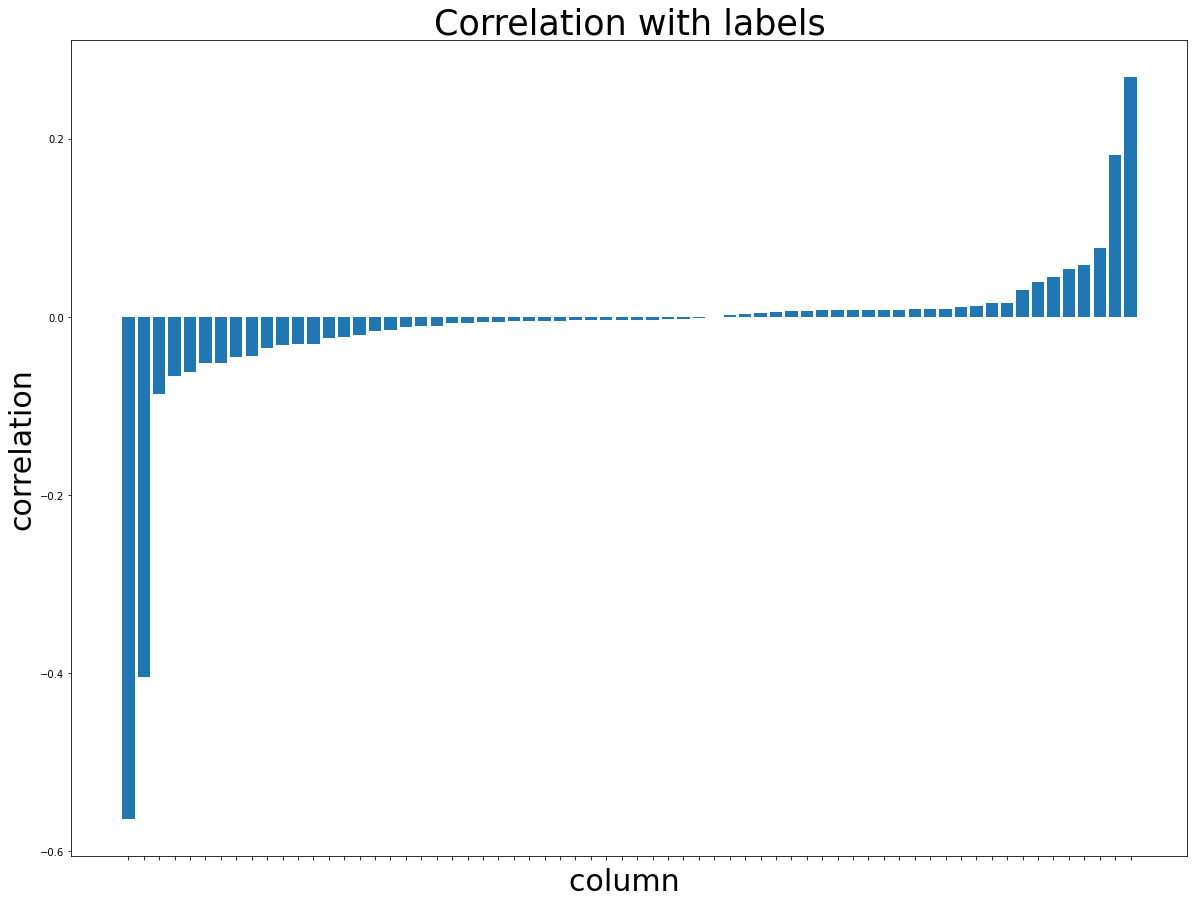

In [11]:
corrs = train_set.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(train_set)

ax.bar(corrs.index,corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

## Duong's part

In [12]:
data_Duong = train_set[cols_Duong].copy()

data_Duong['label']= train_set['label'].values

In [13]:
data_Duong.head()

,data.basic_info.locale,currentLocationCity,currentLocationCountry,currentLocationName,currentLocationState,homeTownCity,homeTownCountry,homeTownName,homeTownState,topFriends,...,Field_80,Field_81,Field_82,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,label
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.466667,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.466667,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.466667,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,1


Text(0.5, 1.0, 'Percentages of missing values in each column')

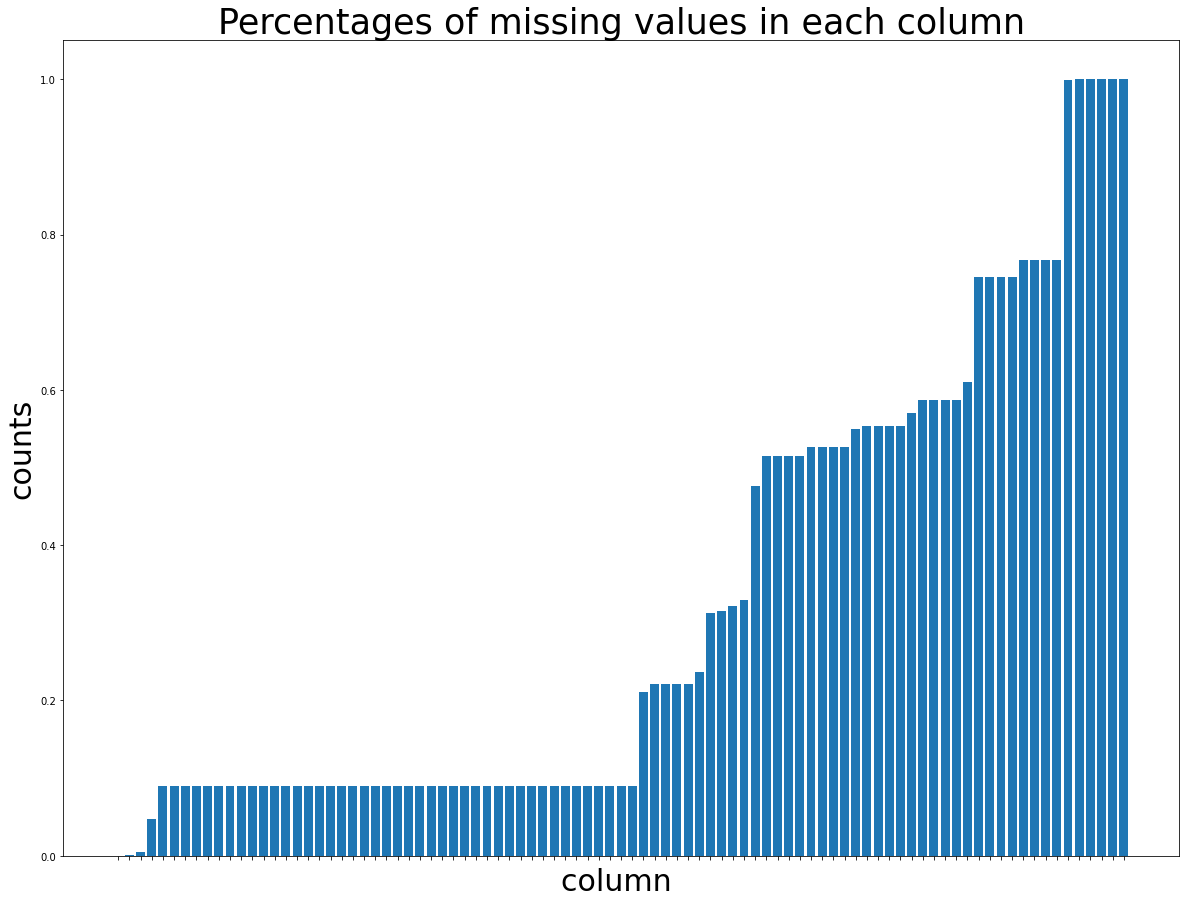

In [14]:
na_counts= data_Duong.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [ ]:
corrs = data_Duong.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(corrs.index, corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

In [ ]:
pd.crosstab(data_Duong['label'],\
            data_Duong['homeTownCountry'], dropna= False)

### Drop columns about geological info

In [ ]:
useless_cols = ['data.basic_info.locale', 'currentLocationCity',
       'currentLocationCountry', 'currentLocationName', 'currentLocationState',
       'homeTownCity', 'homeTownCountry', 'homeTownName', 'homeTownState']
data_Duong.drop(useless_cols, axis= 1, inplace= True)

In [ ]:
len(data_Duong.columns)

In [ ]:
for i, col in enumerate(data_Duong.columns):
    print (i+1, "/ Column name:", col)
    print(data_Duong[col].value_counts(dropna=False))

### For info_social_sex column:

In [ ]:
label_by_info_social_sex = data_Duong.groupby(['label'])\
                ['info_social_sex'].value_counts()
df = pd.DataFrame(label_by_info_social_sex).rename({'info_social_sex':'counts'}, axis=1).reset_index()

### Female has a slightly higher chance of having label 0.
### For the existing values, there are more male than female customers.

In [ ]:
df['pct2'] = df['counts']/df['counts'].sum()
import seaborn as sns

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'info_social_sex', y = 'pct2', \
            hue= 'label', data= df, ax=ax)

ax.set_title("pct of Info social sex by label")

In [ ]:
print ("percentages of male and female in column info_social_sex:")
info_social_sex_pct_original = data_Duong.info_social_sex.value_counts()/data_Duong.info_social_sex.value_counts().sum()
info_social_sex_pct_original

### We'll fill in missing values with 60% male and 40% female

In [ ]:
random.seed(1976)

info_social_sex_random = random.choice(info_social_sex_pct_original.index,\
                                       size= len(data_Duong),\
                                       p= info_social_sex_pct_original.values)
#data_Duong = train_set[cols_Duong].copy()
data_Duong['info_social_sex'] = np.where(data_Duong['info_social_sex'].isnull(),\
            info_social_sex_random,\
            data_Duong['info_social_sex'])

In [ ]:
print ("After filling all NAs...")
data_Duong['info_social_sex'].value_counts()/data_Duong['info_social_sex'].value_counts().sum()

## subscriberCount column
### Plot its distributions

### A lot of missing values

In [ ]:
data_Duong.subscriberCount.value_counts(dropna= False)

## If subscriberCount > 60,000 then label = 0
## We can use it as a factor to automatically fill in label later


In [ ]:
sns.scatterplot(data_Duong.label, data_Duong.subscriberCount)

### it seems like the more subsciber counts, the more likely its label will be 0

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,8)

sns.boxplot(x= 'label', y= 'subscriberCount', data= data_Duong[data_Duong.subscriberCount <100000])
plt.suptitle("box plots of labels based on subscriberCount")

In [ ]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

In [ ]:
print ("General stats data_Duong.subscriberCount")
print ("median   ", data_Duong.subscriberCount.median())
print (data_Duong.subscriberCount.describe())

## Fill in NAs of subscriberCount with mean and std


In [ ]:
subscriberCount_random = data_Duong.subscriberCount.mean() + \
                    data_Duong.subscriberCount.std()*np.random.randn(len(data_Duong))
subscriberCount_random = np.where(subscriberCount_random <0, 0, subscriberCount_random)

In [ ]:
data_Duong['subscriberCount'] = np.where(data_Duong['subscriberCount'].isnull(), \
                                         subscriberCount_random,
                                         data_Duong['subscriberCount'])

In [ ]:
train_set[train_set.Field_36 =='SV'][['Field_36', 'Field_56', 'Field_65', 'maCv']]

In [ ]:
train_set.brief.value_counts()

In [ ]:
train_set[train_set.Field_42 != train_set.Field_41][['Field_42', 'Field_41']]

In [ ]:
df2 = train_set[train_set.Field_42 != train_set.Field_41][['Field_42', 'Field_41']].dropna()

df2

In [ ]:
train_set.groupby('label').Field_36.value_counts()[0]/train_set.Field_36.value_counts()

In [ ]:
train_set.groupby('label').Field_36.value_counts()[1]/train_set.Field_36.value_counts()

In [ ]:
train_set.Field_36.value_counts()

In [ ]:
sns.distplot(train_set.Field_20)

In [ ]:
train_set.Field_21.value_counts()

In [ ]:
train_set.groupby('label').Field_4.value_counts()

In [ ]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

# create custom columns

### column diff_start_end_date = diff between E_startDate and E_endDate

In [ ]:
from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               

## *letter*_diff_date = diff between *letter*_startDate and *letter*_endDate

In [ ]:
data_Duong[['E_endDate', 'F_endDate']]

In [ ]:
train_set.Field_1

In [ ]:
data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

In [ ]:
E_diff_date_counts = data_Duong['E_diff_date'].value_counts()

In [ ]:
E_diff_date_counts

In [ ]:
plt.bar(E_diff_date_counts.index, E_diff_date_counts.values)

## Explore topfriends

In [ ]:
topFriends_counts

In [ ]:
train_set['E_endDate'].equals(train_set['G_endDate'])

In [ ]:
train_set[['Field_14','Field_16']].drop_duplicates()

In [ ]:
for i in range(10):
    if (i%3 == 0):
        continue
    print (i)